# Machine Learning Week 2 Assignment


 Importing the needed Libraries for operation


In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [2]:
# Load dataset
column_names = ["Population","Profit"]  
data = pd.read_csv('ex1data1.txt', names = column_names)

Seperating the columns into Single Arrays

In [8]:
xx=data['Population'].values.reshape(-1,1)
yy=data['Profit'].values.reshape(-1,1)

After Fixing the bug in the Cost FUnction

In [54]:
 
nrows = data.shape[0]
ncols = data.shape[1]

In [58]:
def train(iteration,print_every,alpha):
    xxx=xx.reshape(nrows,1)
    one_stack = np.ones((nrows,1)) 
    x_stack = np.hstack((xxx, one_stack))
    y = data.loc[:, 'Profit'].values # converts to Numpy array
    y = y.reshape(nrows,1)
    
    # Zero initialization of parameters 
    theta = np.array([[0],[0]])
    cost_function = np.zeros(iteration)
    for i in range(0, iteration):
        # Step 1: we make a prediction using the random weights (theta) that we initialized
        # @ is a fancy way do performing dot products
        h = x_stack @ theta
        # Step 2: We take a step to correct the weights (theta) to that the next predicion will be better
        theta = update_weight(h, theta, x_stack,alpha)
        # Step 3: We measure the deviation or error
        cost_function[i] = cost(x_stack, theta)
        
        # Display result every 50 iterations
        if i % print_every  == 0:
            print("Iteration: {}, Cost function: {} ".format(i, cost_function[i]))
            print(f"theta is {theta}")
    return theta, cost_function

In [59]:
def update_weight(h, theta, x,alpha):
    m = nrows
    theta = theta - alpha * (1 / m * ( x.T @ (h - y)))
    return theta

def cost(x, theta):
    m = nrows
    h = x @ theta
    return (1/(2 * m)) * np.sum(np.square(h - y))

In [62]:
theta, cost_values = train(2600,500,0.01)

Iteration: 0, Cost function: 6.737190464870006 
theta is      Profit
0  0.653288
1  0.058391
Iteration: 500, Cost function: 4.712956453749759 
theta is      Profit
0  1.031291
1 -2.285775
Iteration: 1000, Cost function: 4.515815084502823 
theta is      Profit
0  1.127413
1 -3.242582
Iteration: 1500, Cost function: 4.483365143354072 
theta is     Profit
0  1.16641
1 -3.63077
Iteration: 2000, Cost function: 4.4780238053864 
theta is      Profit
0  1.182232
1 -3.788263
Iteration: 2500, Cost function: 4.477144608374791 
theta is      Profit
0  1.188651
1 -3.852159


#After a While, i noticed the cost function became static irrespective of the iterations

# Creating a linear regression object 

In [78]:
lm= LinearRegression()
lm.fit(xx,yy)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Training with all data

In [79]:
lm.fit(xx,yy)
#result for intercept and Coefficient
print (f"Intercept is {lm.intercept_}, Coefficient is {lm.coef_} and Mean Square Error is {mean_squared_error(yy,y_hat)}")

Intercept is [-3.89578088], Coefficient is [[1.19303364]] and Mean Square Error is 8.953942751950358


In [23]:
#predicted value
y_hat= lm.predict(xx)

In [30]:
#comparing predicted and actual values when we train using all data
dfalldata = pd.DataFrame({'Actual': yy.flatten(), 'Predicted': y_hat.flatten()})
dfalldata.head(7)

,Actual,Predicted
0,17.5920,3.393774
1,9.1302,2.698951
2,13.6620,6.267196
3,11.8540,4.459272
4,6.8233,3.095158
5,11.8860,6.105301
6,4.3483,5.023816


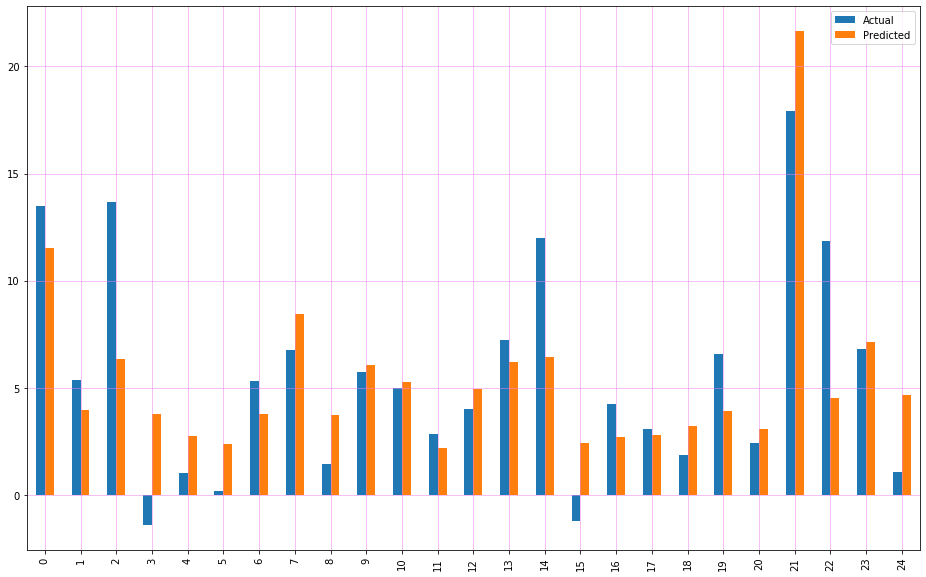

In [35]:
df2alldata = dfalldata.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='violet')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [38]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y, y_hat))  
print('Mean Squared Error:', mean_squared_error(y, y_hat))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y, y_hat)))

Mean Absolute Error: 2.1942453988270065
Mean Squared Error: 8.953942751950358
Root Mean Squared Error: 2.9923139460876023


In [67]:
print("Comparing the two Cost Functions ")
MSE=mean_squared_error(y,y_hat)
CostFunc=MSE/2
print(f"Cost func using sklearn is {CostFunc} while  using gradient descent is {cost_values[-1]}" )
print(f"Approximately the same")

Comparing the two Cost Functions 
Cost func using sklearn is 4.476971375975179 while  using gradient descent is 4.477092570633308
Approximately the same


# Splitting the data into training and test data 

In [16]:
#Splitting the model,so i can use 70% of the data to train and using 30percent for test
x_train,x_test,y_train,y_test= train_test_split(xx,yy,test_size=0.3,random_state=0)

In [17]:
lms= LinearRegression()
#training the algorithm
lms.fit(x_train,y_train) 
lms.intercept_, lms.coef_

(array([-3.86246206]), array([[1.19869775]]))

In [24]:
y_pred = lms.predict(x_test)

In [28]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df.head(7)

,Actual,Predicted
0,13.50100,11.514433
1,5.34360,3.948133
2,13.66200,6.348765
3,-1.42110,3.759937
4,1.01730,2.729656
5,0.20421,2.356861
6,5.30480,3.767729


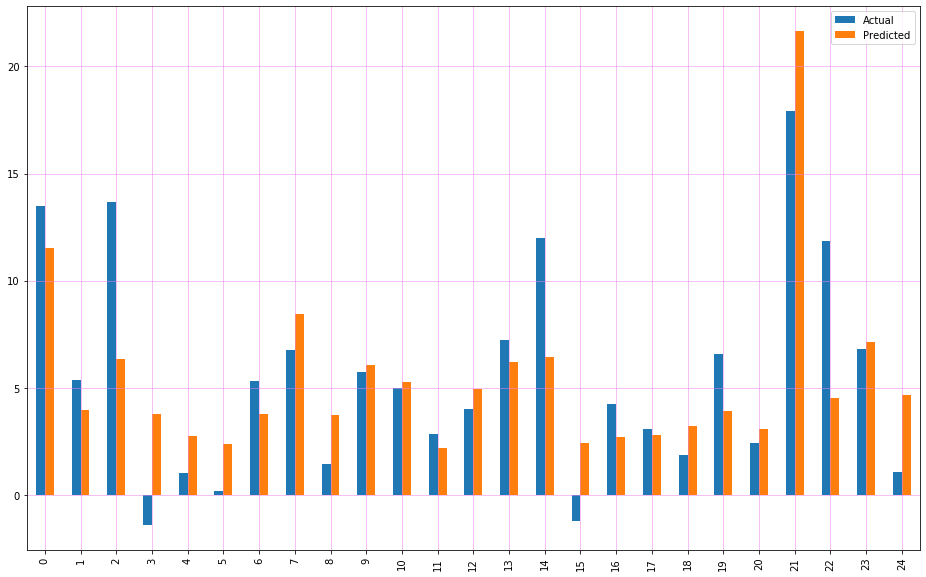

In [34]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='violet')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

# My observation


In [68]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 2.341654819981191
Mean Squared Error: 9.097634202063354
Root Mean Squared Error: 3.016228473120588


In [70]:
print("Comparing the two Cost Functions ")
MSE_test=mean_squared_error(y_test,y_pred)
CostFunc_test=MSE_test/2
print(f"Cost func using sklearn is {CostFunc_test} while  using gradient descent is {cost_values[-1]}" )
print(f"very close")

Comparing the two Cost Functions 
Cost func using sklearn is 4.548817101031677 while  using gradient descent is 4.477092570633308
very close





# Normalizing the dataset

In [80]:
#Creating the linearregression object as welll as Normalizing 
lmc=LinearRegression(normalize=True)

In [74]:
lmc.fit(xx,yy)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [75]:
lmc.intercept_

array([-3.89578088])

In [76]:
lmc.coef_

array([[1.19303364]])

In [ ]:
After Normalization they still remain the same...